In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc

In [23]:
# Load data and add column names
name = 'AutoXYTest_20230309_163921'
headers = ['X (mm)', 'Y (mm)']
data = pd.read_csv('.\Results\%s.csv' %name, names=headers) #select your file
#start = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: (x != 0) and not x % 2)
start = data.iloc[::3, :]
#destination = pd.read_csv('.\Results\pre_20230113_145250.csv', nrows=1, names=headers) #select your file
destination = data.iloc[1::3, :]
#end = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: x % 2)
end = data.iloc[2::3, :]
moves = data[data.index % 3 != 1]

In [24]:
print(moves)

     X (mm)   Y (mm)
0   8.12175  5.29125
2   8.19825  5.29125
3   8.19825  5.29125
5   6.26025  4.92575
6   6.26875  4.93425
8   6.31125  6.25175
9   6.31125  6.25175
11  7.80725  4.04175
12  7.80725  4.04175
14  8.45325  7.72225


[1, 2, 3, 4, 5]


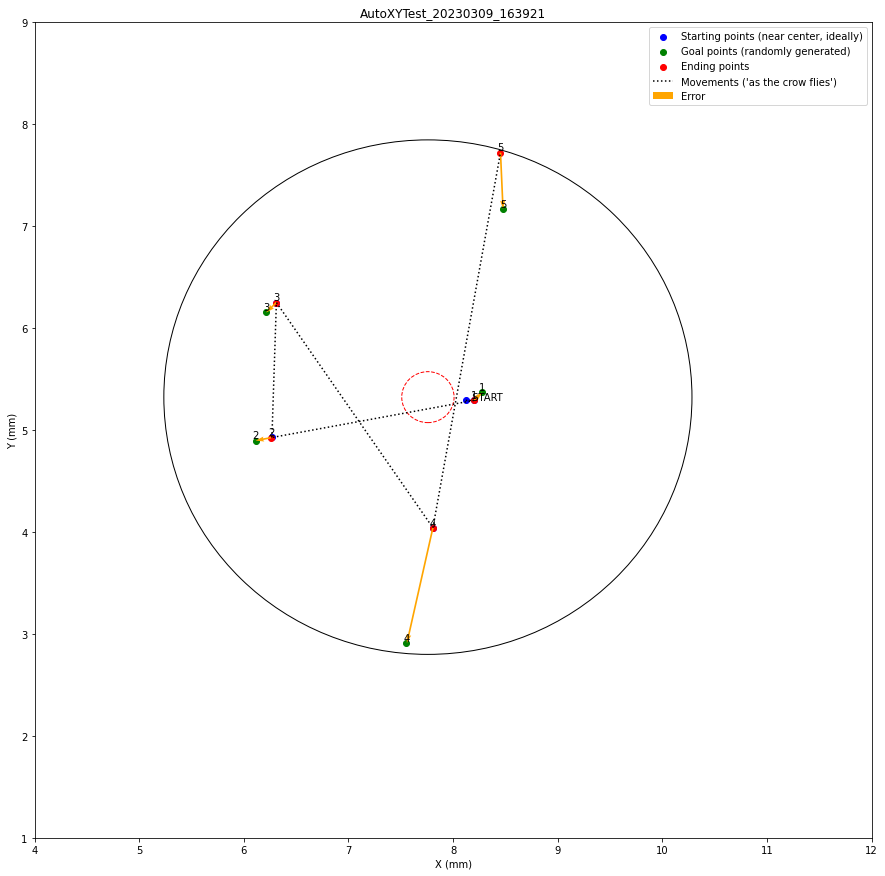

In [25]:
# Plot
steps = list(range(1,len(destination['X (mm)']) +1))
print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(start['X (mm)'], start['Y (mm)'],color='blue',label="Starting points (near center, ideally)")
plt.scatter(destination['X (mm)'], destination['Y (mm)'],c='green',label="Goal points (randomly generated)")
for (xi, yi, i) in zip(destination['X (mm)'], destination['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
plt.scatter(end['X (mm)'], end['Y (mm)'],color='red',label="Ending points")
for (xi, yi, i) in zip(end['X (mm)'], end['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

plt.text(data['X (mm)'][0],data['Y (mm)'][0],'  START',size = 10)
#plt.text(end['X (mm)'][-1:],end['Y (mm)'][-1:],'  END',size = 10)
plt.plot(moves['X (mm)'],moves['Y (mm)'],color = 'black', linestyle = ':',label="Movements ('as the crow flies')" )

endx = end['X (mm)'].tolist()
endy = end['Y (mm)'].tolist()
destx = destination['X (mm)'].tolist()
desty = destination['Y (mm)'].tolist()

xdiffs = np.subtract(destx, endx)
xerror = list(xdiffs)

ydiffs = np.subtract(desty, endy)
yerror = list(ydiffs)


plt.quiver(end['X (mm)'], end['Y (mm)'], xerror, yerror, scale_units ='xy', scale = 1, width=.002,color='orange',label="Error")

#ab = AnchoredText("University of Michigan", loc="lower left", frameon=False, borderpad=0, prop=dict(alpha=0.5), )
#ab.set_zorder(0)
#ax.add_artist(ab)

plt.title(name)
plt.xlim(4,12)
plt.ylim(1,9)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()